###IMAGES AS GRID OF PIXELS

by Chetna Agarwal

In [1]:
import numpy as np
import matplotlib.image as mpimg # for reading in images
import matplotlib.pyplot as plt
import cv2 # computer vision library
%matplotlib inline
# if we use '%matplotlib qt' - images will be displayed in an interactive pop up window

Image dimensions :  (427, 640, 3)


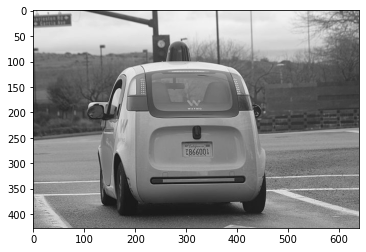

In [2]:
# READ IN AND DISPLAY THE IMAGE
image = mpimg.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/1. Image representation/images/waymo_car.jpg')

# print out the image dimensions
print('Image dimensions : ', image.shape)

# change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap = 'gray')

In [3]:
# Print specific grayscale pixel values
# what is the pixel value at x = 400 and y = 300 

x = 400
y = 300

print(gray_image[y,x]) # to extract pixel value

159


In [4]:
# find maximum and minimum grayscale values in this image
max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Min: ', min_val)

Max:  255
Min:  2


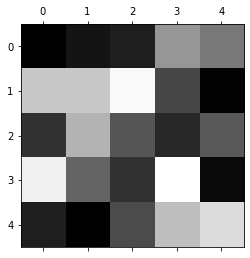

In [5]:
# Create a 5X5 image using just grayscale, numerical values\
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

# to show the pixel grid, use matshow
plt.matshow(tiny_image, cmap = 'gray')

###VISUALIZING RGB CHANNELS

In [6]:
# RGB COLORSPACE

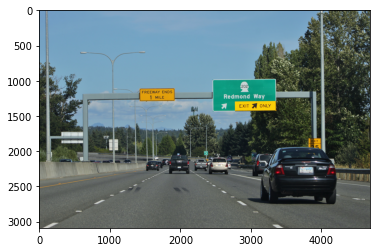

In [7]:
# read in an image
image = mpimg.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/1. Image representation/images/wa_state_highway.jpg')

plt.imshow(image)

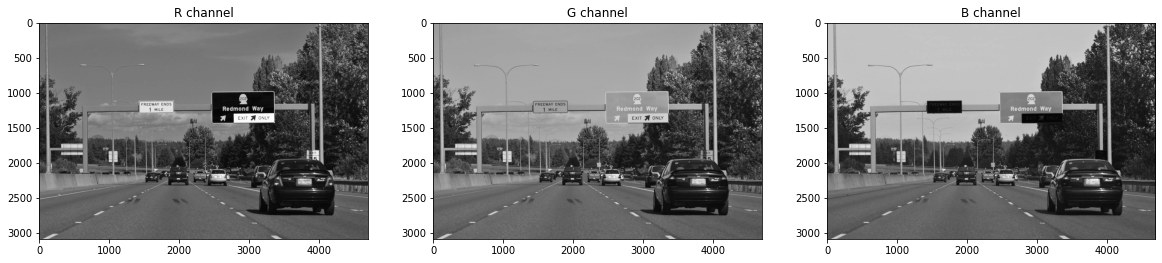

In [8]:
# RGB Channels - Visualize the levels of each color channel

# isolate each colr channel
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap = 'gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap = 'gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap = 'gray')

###COLOR THRESHOLD AND BLUE SCREEN 

In [9]:
image = mpimg.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/1. Image representation/images/pizza_bluescreen.jpg')
type(image), image.shape

(numpy.ndarray, (514, 816, 3))

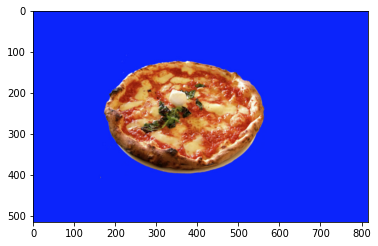

In [10]:
image_copy = np.copy(image)
#image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [11]:
# define the color threshold
lower_blue = np.array([0,0,220])
upper_blue = np.array([250,250,255])
# play around with pixel values to isoltae blue color

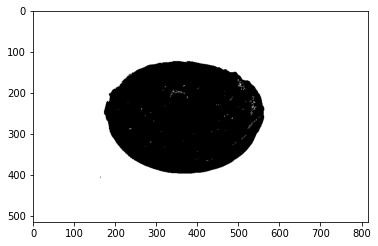

In [12]:
# create a mask
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap = 'gray')

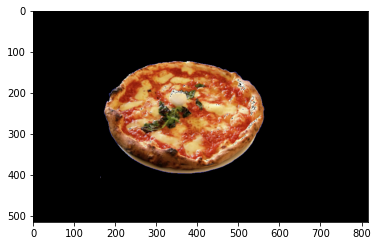

In [13]:
# mask the image to let the pizza show through
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0,0,0]
plt.imshow(masked_image)

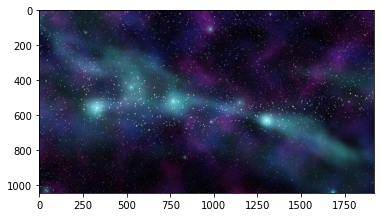

In [14]:
# mask and add backgroung image
background_image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/1. Image representation/images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
plt.imshow(background_image)

In [15]:
masked_image.shape

(514, 816, 3)

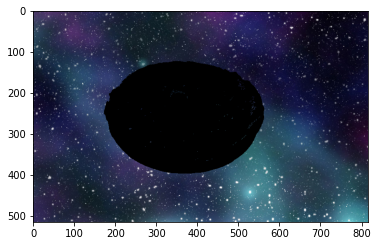

In [16]:
# crop the background image to the size of masked image
crop_background = background_image[0:514, 0:816]
crop_background[mask == 0] = [0,0,0]
plt.imshow(crop_background)

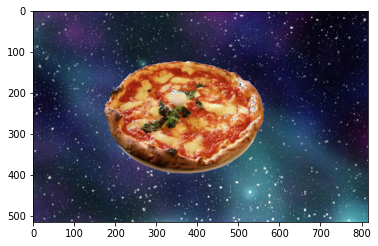

In [17]:
# create complete image
final_image = crop_background + masked_image
plt.imshow(final_image)

###COLOR THRESHOLD AND GREEN SCREEN

In [18]:
image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/1. Image representation/images/car_green_screen.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(450, 660, 3)

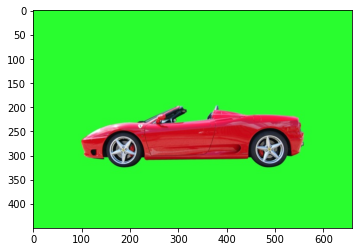

In [19]:
plt.imshow(image)

In [20]:
# color threshold
lower_green = np.array([0,150,20]) 
upper_green = np.array([250,255,250])

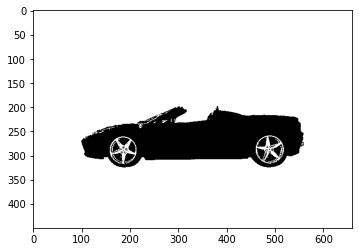

In [21]:
# create a mask
mask = cv2.inRange(image, lower_green, upper_green)
plt.imshow(mask, cmap = 'gray')

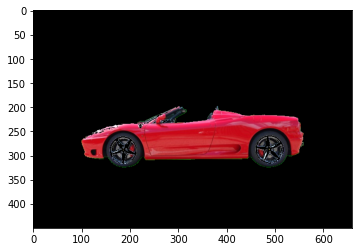

In [22]:
masked_image = np.copy(image)
masked_image[mask != 0] = [0,0,0]
plt.imshow(masked_image)

In [23]:
# mask and add background image
background_image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/1. Image representation/images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

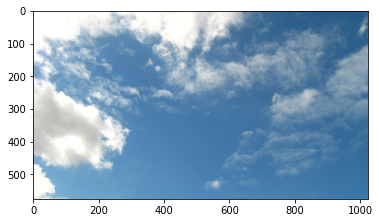

In [24]:
plt.imshow(background_image)

In [25]:
background_image = background_image[0:450, 0:660]

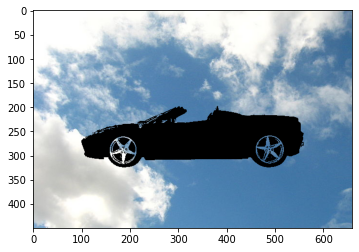

In [26]:
# mask the opposite area of the previous image
background_image[mask == 0] = [0,0,0]
plt.imshow(background_image)

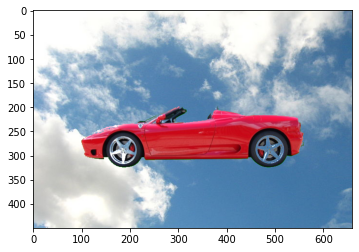

In [27]:
complete_image = background_image + masked_image
plt.imshow(complete_image)

###HSV COLOR SPACE, BALLOONS

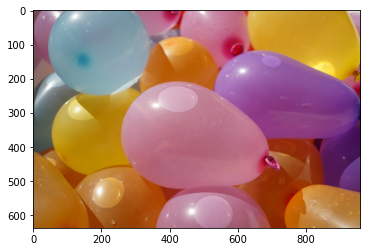

In [28]:
image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/1. Image representation/images/water_balloons.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

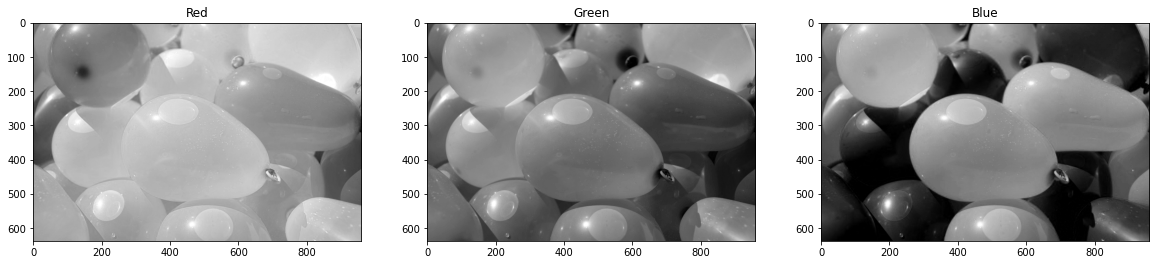

In [29]:
# plot color channels

# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

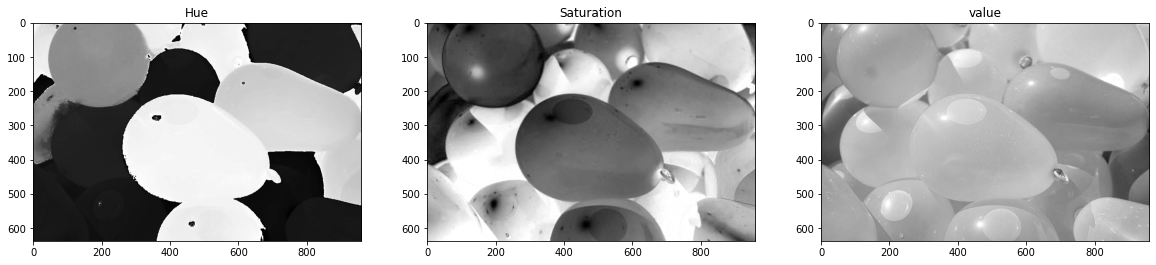

In [30]:
# convert from rgb to hsv
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h = image_hsv[:,:,0]
s = image_hsv[:,:,1]
v = image_hsv[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.set_title('Hue')
ax1.imshow(h, cmap = 'gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap = 'gray')

ax3.set_title('value')
ax3.imshow(v, cmap = 'gray')

In [31]:
# define pink and hue selection thresholds
# define our color selection criteria in HSV values
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])

In [32]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

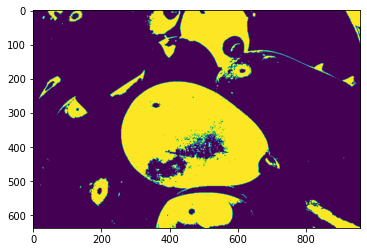

In [33]:
# mask the image
# define the masked area in rgb space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)
plt.imshow(mask_rgb)

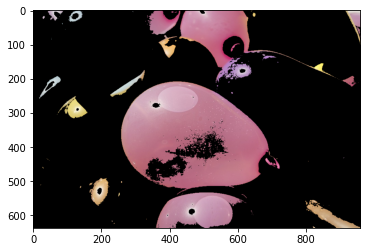

In [34]:
# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb == 0] = [0, 0, 0]
plt.imshow(masked_image)

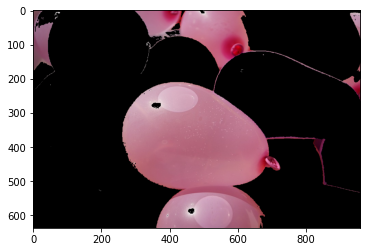

In [35]:
# now try in hsv
# define masked area in hsv color space
mask_hsv = cv2.inRange(image_hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

###DAY AND NIGHT CLASSIFIER

VISUALIZING THE DATA

In [36]:
# the dataset contains 200 images, 100 for day and 100 for night
# 60 % images - in training set
# 40 % images - in testing set

In [37]:
# training and testing data
image_dir_training = '/content/drive/MyDrive/CV ND /1. Intro to CV/1. Image representation/day_night_images/training'
image_dir_testing = '/content/drive/MyDrive/CV ND /1. Intro to CV/1. Image representation/day_night_images/test'

In [38]:
# Helper functions

import os
import glob # library for loading images from a directory
import matplotlib.image as mpimg

import cv2



# This function loads in images and their labels and places them in a list
# The list contains all images and their associated labels
# For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list
def load_dataset(image_dir):
    
    # Populate this empty image list
    im_list = []
    image_types = ["day", "night"]
    
    # Iterate through each color folder
    for im_type in image_types:
        
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            # Read in the image
            im = mpimg.imread(file)
            
            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))
    
    return im_list



## Standardize the input images
# Resize each image to the desired input size: 600x1100px (hxw).

## Standardize the output
# With each loaded image, we also specify the expected output.
# For this, we use binary numerical values 0/1 = night/day.


# This function should take in an RGB image and return a new, standardized version
# 600 height x 1100 width image size (px x px)
def standardize_input(image):
    
    # Resize image and pre-process so that all "standard" images are the same size
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im


# Examples:
# encode("day") should return: 1
# encode("night") should return: 0
def encode(label):
    
    numerical_val = 0
    if(label == 'day'):
        numerical_val = 1
    # else it is night and can stay 0
    
    return numerical_val

# using both functions above, standardize the input images and output labels
def standardize(image_list):
    
    # Empty image data array
    standard_list = []
    
    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]
        
        # Standardize the image
        standardized_im = standardize_input(image)
        
        # Create a numerical label
        binary_label = encode(label)
        
        # Append the image, and it's one hot encoded label to the full, processed list of image data
        standard_list.append((standardized_im, binary_label))
    
    return standard_list


In [39]:
# load training data
IMAGE_LIST = load_dataset(image_dir_training)

In [40]:
# visualize input images
# select and image and label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]
selected_image.shape, selected_label

((469, 640, 3), 'day')

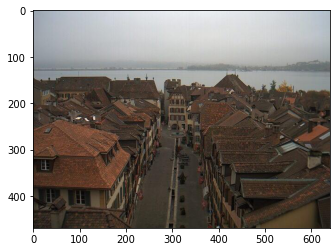

In [41]:
import matplotlib.pyplot as plt
plt.imshow(selected_image)

In [42]:
selected_image.shape, selected_label

((469, 640, 3), 'day')

STANDARDIZING THE DATA

In [43]:
# preprocess the data - after loading in the images, have to standardize the input and output
# It is important to make all the inout images of the same size so that can be processed using the same pipeline. 
# resize each image to desired input size : 600 X 1100 px

def standardize_input(image): # takes in rgb image
  standard_im = cv2.resize(image, (1100, 600))
  return standard_im


In [44]:
# standardize the expected output
# here, use binary numerical values 0/1 = night/day

def encode(label):
  if(label == 'day'):
    return 1
  else:
    return 0

In [48]:
# Construct a STANDARDIZED_LIST of input images and output labels
# define function that takes in a list of image-label pairs and outputs a standardised 
# list of resized images and numerical labels.
def standardize(image_list):
  # empty image data array
  standard_list = []
  
  # iterate through all the image-label pairs
  for item in image_list:
    image = item[0]
    label = item[1]

    # standardize the image
    standardized_im = standardize_input(image)

    # create a numerical label
    binary_label = encode(label)

    # append the image, and its ohe label to the full, processed list of image data
    standard_list.append((standardized_im, binary_label))

    return standard_list

STANDARDIZED_LIST = standardize(IMAGE_LIST)

VISUALIZE THE STANDARDIZED DATA

Shape: (469, 640, 3)
Label [1 = day, 0 = night]: 1


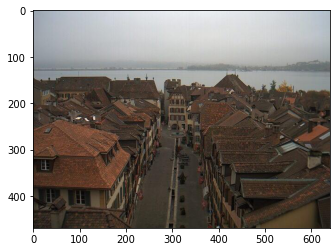

In [49]:
# dispaly a standardized image and its label

# select an image by index
image_num = 0
selected_label = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

FEATURE EXTRACTION

In [50]:
# create a feature that represents brightness in an image. Extract the avg brightness 
# using HSV colorspace. Use the V channel (a measure of brightness), add up the pixel
# values in the v channel, then divide the sum by the area of the image to get the 
# average value of the image.

Label: 1


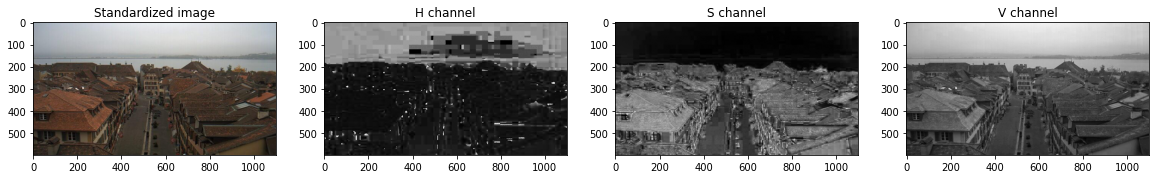

In [51]:
# convert a test image into HSV colorspace and visualize the individual color channels.
image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [53]:
# Find avg brightness using V channel.
# function that takes in a standardized RGB image and returns a feature (a single 
# value) that repesents the avg brightness level in the image. 
def avg_brightness(rgb_image):
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    
    ## TODO: Calculate the average brightness using the area of the image
    # and the sum calculated above
    avg = 0
    
    return avg

In [ ]:
# Test the average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "day" image is loaded in and its avg brightness is displayed
image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)